# What drives the price of a car?

![](images/kurt.jpeg)

# Data Analysis and Price Predict Report for Used Cars


## Introduction

In this report, we provided data analysis and price prediction model based on 426K used cars data. Conclusion is draw on the critical factors that impact car price and a car price prediction model is also recommanded. The purpose of the analysis is to help car dealership making informed decisions, optimizing operations, and delivering better value to customers.


In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

## Business Understanding

The business objective is to understand the factors that impact used car prices. <br>
Data Problem Definition: 
* regression analysis to identify the key features that impact used car prices
* create a predictive model that estimates the market value of used cars based on the features identified above

## Standard package imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import numpy as np


# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

## Data Understanding
Data is loaded from data/vehicles.csv, the original data is presented with the following fields: <br>

<pre>
    - id
    - region 
    - price 
    - year
    - manufacturer
    - model
    - condition
    - cylinders
    - odometer
    - transmission
    - VIN
    - drive
    - size
    - type
    - paint_color
    - state
</pre> 

In [4]:
df = pd.read_csv('data/vehicles.csv')

#df = pd.read_csv('data/vehicles.csv', index_col=0, infer_datetime_format=True)

In [5]:
df.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
97865,7301594221,heartland florida,32990,2015.0,chevrolet,ss sedan 4d,good,8 cylinders,gas,84498.0,clean,automatic,6G3F15RW8FL107349,rwd,NaN,sedan,green,fl
362141,7308802820,tri-cities,38634,2016.0,gmc,yukon,NaN,8 cylinders,gas,85662.0,clean,automatic,NaN,rwd,full-size,SUV,black,tn
162128,7311402498,omaha / council bluffs,29988,2015.0,bmw,x5,NaN,NaN,gas,62974.0,clean,automatic,5UXKR0C56F0K57094,NaN,NaN,NaN,NaN,ia
316958,7313432996,eugene,7995,2007.0,nissan,sentra,NaN,NaN,gas,111458.0,clean,automatic,3N1AB61EX7L620480,fwd,NaN,sedan,NaN,or
220247,7305214781,columbia / jeff city,22990,2018.0,acura,ilx technology plus and,good,NaN,other,17845.0,clean,automatic,19UDE2F8XJA001150,fwd,NaN,sedan,NaN,mo


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### How many Cars are there?

In [7]:
df.shape

(426880, 18)

### Check NULL values

In [8]:
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

## Data Preparation

By initial checking the data, identify columns can be dropped

In [9]:
base_data = df.copy()

#drop not related columns
drop_columns = ['id', 'region', 'model', 'title_status', 'VIN', 'size', 'state']
base_data = base_data.drop(columns = drop_columns)

#drop nan
base_data = base_data.dropna()

base_data.shape

(117169, 11)

In [10]:
for col in base_data:
    print(base_data[col].unique())
#pd.Series({col:df[col].unique() for col in df})

[15000 27990 34590 ... 46350  3670 27294]
[2013. 2012. 2016. 2019. 2011. 2017. 2018. 2004. 2001. 2014. 2003. 2008.
 2007. 2020. 2006. 2005. 2010. 2009. 2002. 2015. 1995. 1974. 1996. 1955.
 1972. 2021. 1994. 1988. 2000. 1979. 1984. 1998. 1992. 1999. 1978. 1937.
 1976. 1991. 1953. 1963. 1968. 1997. 1993. 1990. 1982. 1948. 1986. 1985.
 1951. 1936. 1966. 1989. 1967. 1981. 1947. 1962. 1973. 1975. 1958. 1964.
 1934. 1977. 1971. 1946. 1957. 1987. 1930. 1969. 1980. 1959. 1965. 1928.
 1933. 1960. 1970. 1929. 1932. 1956. 1924. 1927. 1952. 1939. 1983. 1923.
 1940. 1961. 1918. 1950. 1938. 1949. 1900. 1931. 1926. 1942. 1913. 1954.
 2022. 1935. 1941. 1922. 1905. 1925. 1916. 1944.]
['ford' 'gmc' 'chevrolet' 'toyota' 'jeep' 'nissan' 'honda' 'dodge'
 'chrysler' 'ram' 'mercedes-benz' 'infiniti' 'bmw' 'volkswagen' 'mazda'
 'porsche' 'lexus' 'rover' 'ferrari' 'audi' 'mitsubishi' 'kia' 'hyundai'
 'fiat' 'acura' 'cadillac' 'lincoln' 'jaguar' 'saturn' 'volvo'
 'alfa-romeo' 'buick' 'subaru' 'pontiac' 'mini' '

Transfer data

In [11]:
#check price, eliminate outsiders
print("price max ", base_data.price.max()) 
print("price min ", base_data.price.min())
base_data['price'] = base_data['price'].astype('float64')
base_data = base_data.loc[base_data['price'] > 1000]
base_data = base_data.loc[base_data['price'] < 60000]
#base_data.hist(column='price',bins=40, figsize=(12,8), zorder=2, rwidth=0.9)

#convert year to age
print("year max ", base_data.year.max())  # check the most recent year
base_data = base_data.astype({'year':'int'}) #convert to int
base_data['age'] = (base_data.year.max() - base_data['year']).astype(int) #calculate age
base_data['age'].value_counts() # check value counts
base_data = base_data.loc[base_data['age'] <= 40] #eliminate the values

#plot age
#base_data.hist(column='age',bins=40, figsize=(12,8), zorder=2, rwidth=0.9)

#cylinders column -- remove surfix, covert to int
base_data = base_data.replace({'cylinders': {'6 cylinders':6, '8 cylinders':8, '4 cylinders':4, '5 cylinders':5, '10 cylinders':10, '3 cylinders':3, 'other':np.nan, '12 cylinders':12}})

#fuel -- remove 'other'
base_data = base_data.replace({'fuel': {'other':np.nan}})

#transmission -- remove 'other'
base_data = base_data.replace({'transmission': {'other':np.nan}})

#drop nan
base_data = base_data.dropna()

print("shape before: ", base_data.shape)

# analysis manufacturer specific data
#temp = base_data.copy()
#table = temp.groupby(['manufacturer'])['price'].mean()
#print("sorted price mean for manufacturers: ", table.sort_values())
#temp = temp.merge(table.reset_index(), how='left', on='manufacturer')
#bins = [0,10000,25000,50000]
#cars_bins = ['Budget','Medium', 'Highend']
#print(temp.head())

#base_data['car_range'] = pd.cut(temp['price_y'], bins,  right=False, labels=cars_bins)


#print("shape after: ", base_data.shape)

price max  3736928711
price min  0
year max  2022.0
shape before:  (93758, 12)


In [12]:
print(base_data.head())
print(base_data.shape)
base_data.info()
for col in base_data:
    print(base_data[col].unique())

base_data.isnull().sum()

      price  year manufacturer  condition  cylinders    fuel  odometer  \
31  15000.0  2013         ford  excellent        6.0     gas  128000.0   
34  35000.0  2019       toyota  excellent        6.0     gas   43000.0   
55  19900.0  2004         ford       good        8.0  diesel   88000.0   
59  14000.0  2012        honda  excellent        6.0     gas   95000.0   
65  22500.0  2001         ford       good        8.0  diesel  144700.0   

   transmission drive      type paint_color  age  
31    automatic   rwd     truck       black    9  
34    automatic   4wd     truck        grey    3  
55    automatic   4wd    pickup        blue   18  
59    automatic   fwd  mini-van      silver   10  
65       manual   rwd     truck       white   21  
(93758, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 93758 entries, 31 to 426874
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         93758 non-null  float64
 1

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
type            0
paint_color     0
age             0
dtype: int64

### Check initial correlation and data

In [13]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
numeric_columns = []
features = base_data.columns.values.tolist()
for col in features:
    if base_data[col].dtype in numerics:
        numeric_columns.append(col)
    else:
        categorical_columns.append(col)

print('categorical columns:', categorical_columns)
print('numeric columns', numeric_columns) 



categorical columns: ['manufacturer', 'condition', 'fuel', 'transmission', 'drive', 'type', 'paint_color']
numeric columns ['price', 'year', 'cylinders', 'odometer', 'age']


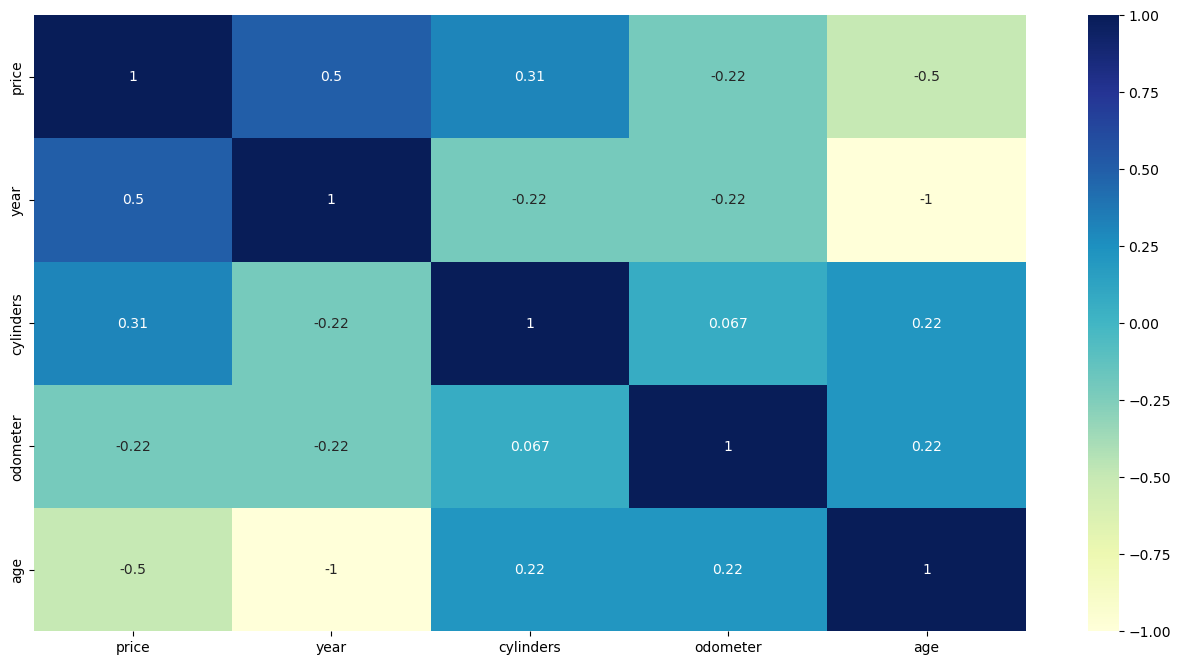

In [14]:
# check Correlation matrix for numeric columns
# All numeric (float and int) variables in the dataset
cars_numeric = base_data.select_dtypes(include=numerics)
cars_numeric.head()
cor = cars_numeric.corr()

# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

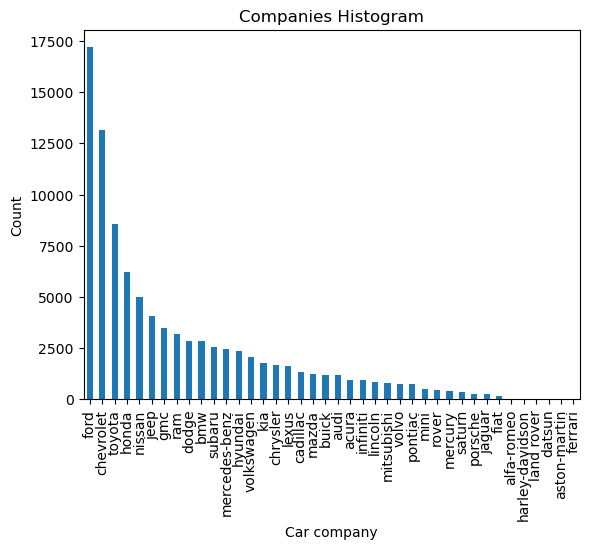

In [15]:
#plot car range
plt1 = base_data.manufacturer.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Count')
plt.show()

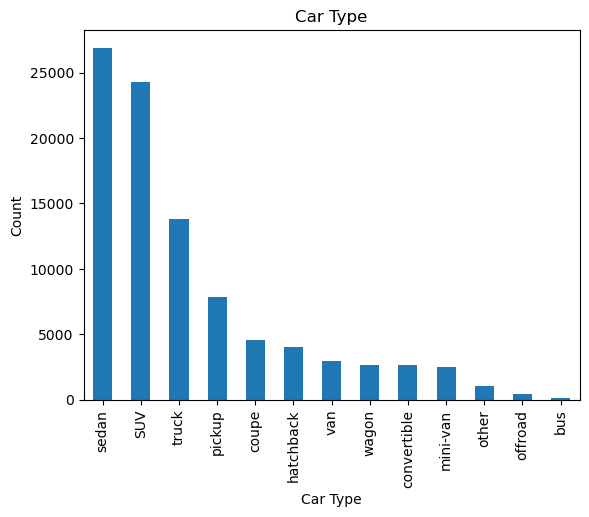

In [16]:
#plot type
plt2 = base_data.type.value_counts().plot(kind='bar')
plt.title('Car Type')
plt2.set(xlabel = 'Car Type', ylabel='Count')
plt.show()

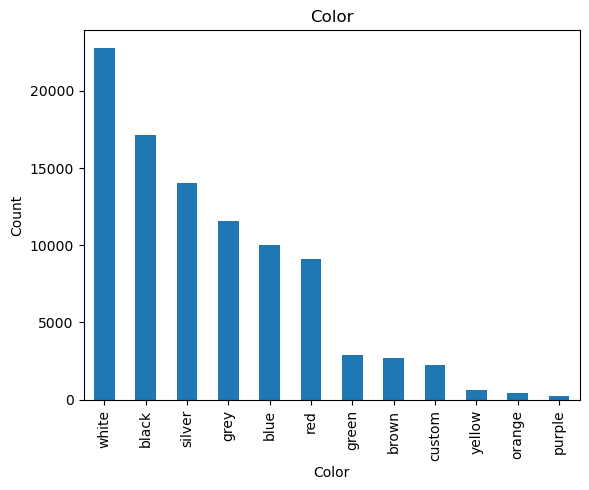

In [17]:
#plot color
plt3 = base_data.paint_color.value_counts().plot(kind='bar')
plt.title('Color')
plt3.set(xlabel = 'Color', ylabel='Count')
plt.show()

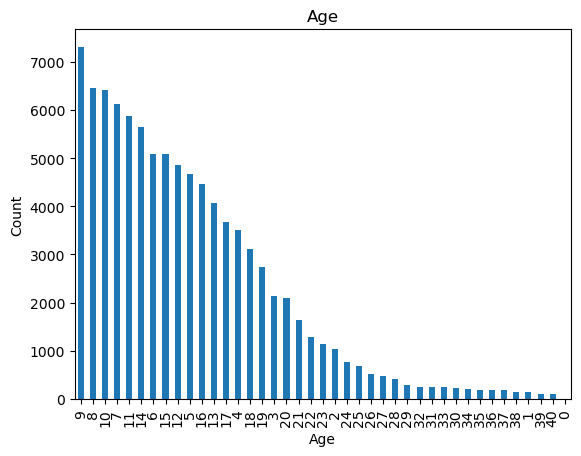

In [18]:
#plot age
plt4 = base_data.age.value_counts().plot(kind='bar')
plt.title('Age')
plt4.set(xlabel = 'Age', ylabel='Count')
plt.show()

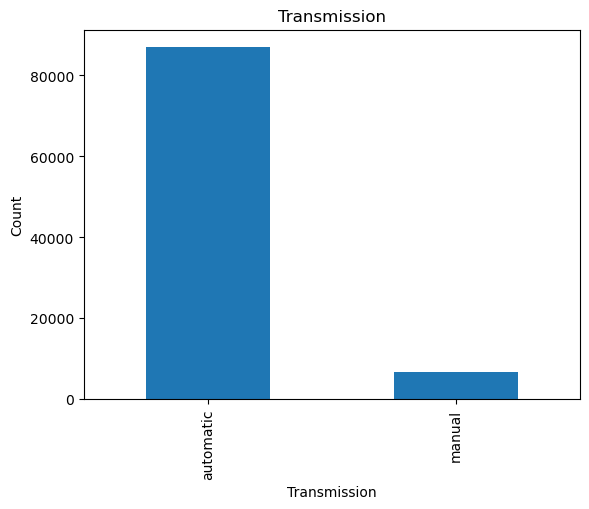

In [19]:
#plot transmission
plt5 = base_data.transmission.value_counts().plot(kind='bar')
plt.title('Transmission')
plt5.set(xlabel = 'Transmission', ylabel='Count')
plt.show()

[Text(0.5, 0, 'Fuel'), Text(0, 0.5, 'Count')]

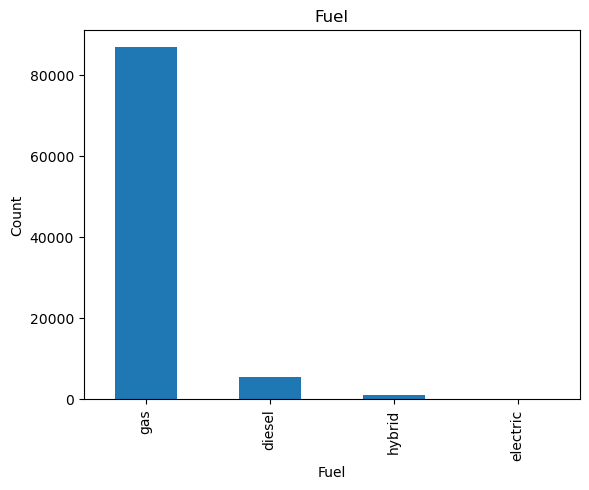

In [20]:
#plot fuel
plt6 = base_data.fuel.value_counts().plot(kind='bar')
plt.title('Fuel')
plt6.set(xlabel = 'Fuel', ylabel='Count')

[Text(0.5, 0, 'Drive'), Text(0, 0.5, 'Count')]

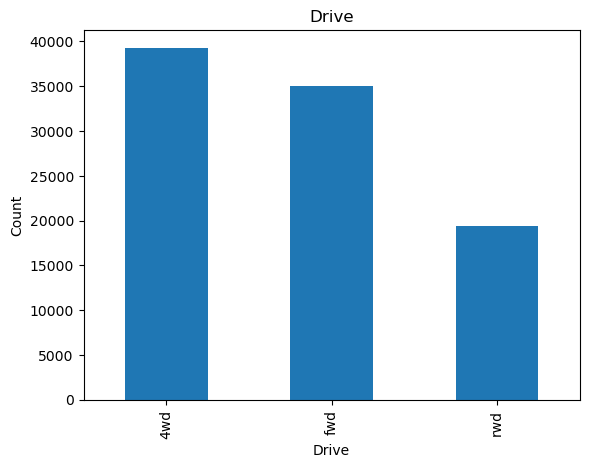

In [21]:
#plot drive
plt7 = base_data.drive.value_counts().plot(kind='bar')
plt.title('Drive')
plt7.set(xlabel = 'Drive', ylabel='Count')

[Text(0.5, 0, 'Cylinders'), Text(0, 0.5, 'Count')]

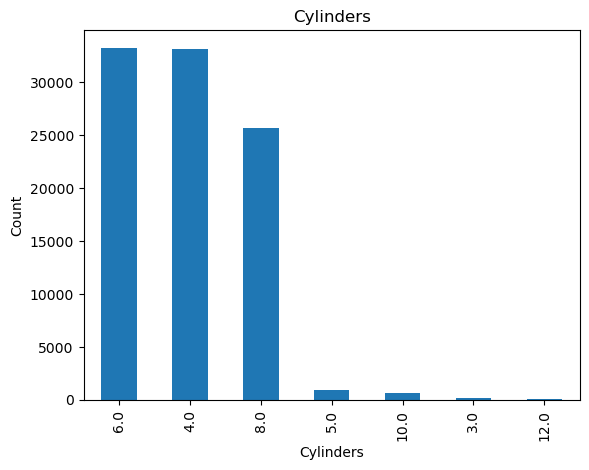

In [22]:
#plot cylinders
plt8 = base_data.cylinders.value_counts().plot(kind='bar')
plt.title('Cylinders')
plt8.set(xlabel = 'Cylinders', ylabel='Count')

### Conclusion on initial data analysis

* Based on correlation of the numeric columns, price has stronger relation with the age
* The manufacturer that has the most number of cars sold is Ford
* Car types that customers like the most are: seadan and SVU
* Car ages at 7,8,9,10 have the most sale
* Most of the cars for deal are automatic with gas



## Modeling

In [23]:
#drop converted columns
drop_columns = ['year','manufacturer']
base_data = base_data.drop(columns = drop_columns)

In [24]:
# Encoding categorical features
for col in categorical_columns:
    if col in base_data.columns:
        le = LabelEncoder()
        le.fit(list(base_data[col].astype(str).values))
        base_data[col] = le.transform(list(base_data[col].astype(str).values))

# One-hot encode the categorical columns
#base_encoded = pd.get_dummies(base_data, drop_first=True)

print(base_data)
base_data.shape
base_data.info()

          price  condition  cylinders  fuel  odometer  transmission  drive  \
31      15000.0          0        6.0     2  128000.0             0      2   
34      35000.0          0        6.0     2   43000.0             0      0   
55      19900.0          2        8.0     0   88000.0             0      0   
59      14000.0          0        6.0     2   95000.0             0      1   
65      22500.0          2        8.0     0  144700.0             1      2   
...         ...        ...        ...   ...       ...           ...    ...   
426831   9800.0          3        6.0     2  115000.0             0      2   
426833   6800.0          2        8.0     2   69550.0             0      2   
426860  39990.0          2        8.0     2   41664.0             0      0   
426866  32990.0          2        8.0     2   55612.0             0      2   
426874  33590.0          2        6.0     2   30814.0             0      2   

        type  paint_color  age  
31        10            0    9

In [25]:
from sklearn.model_selection import train_test_split

#create test data
X = base_data.drop(['price'], axis = 1)
y = base_data['price']

X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42) 

In [26]:
X_train.head()

,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,age
68705,0,4.0,2,164.0,0,1,9,10,13
242383,0,8.0,2,100918.0,0,0,10,5,7
91447,2,8.0,0,59429.0,0,0,10,8,16
155617,2,4.0,2,136224.0,0,1,3,5,12
75981,0,6.0,2,143869.0,0,0,0,11,10


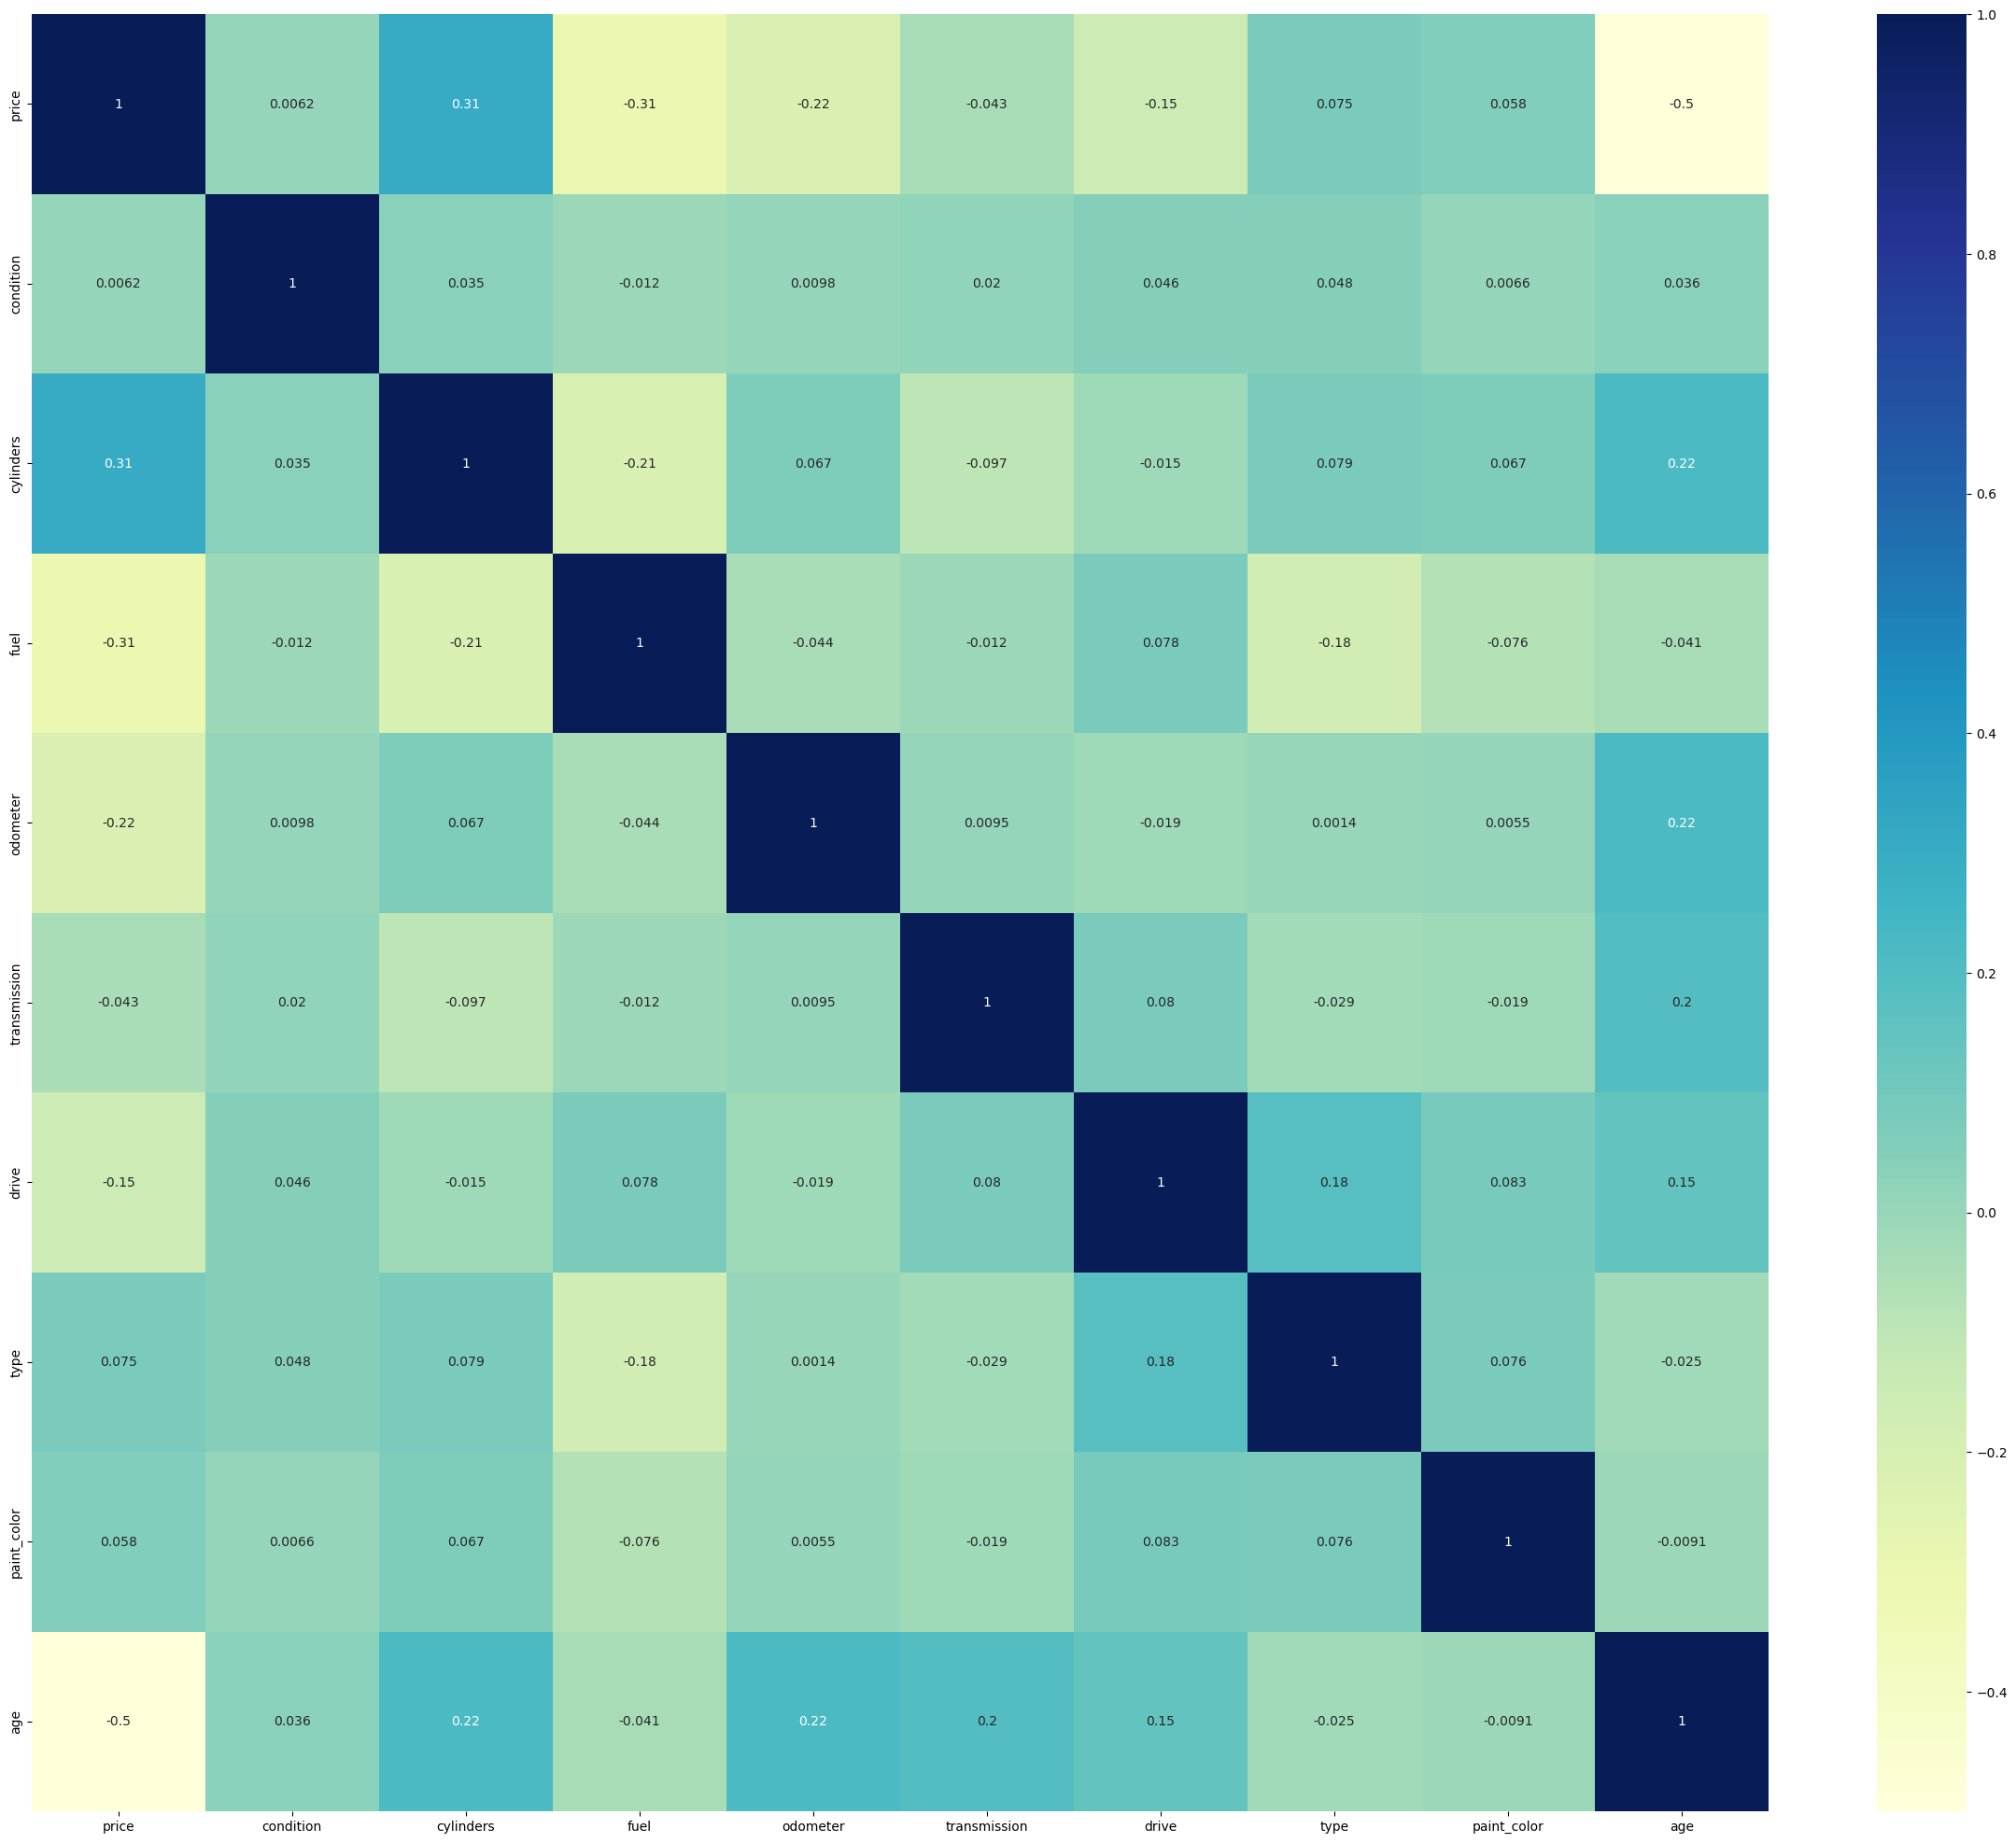

In [27]:
# correlation

plt.figure(figsize = (30, 25))
sns.heatmap(base_data.corr(), annot = True, cmap="YlGnBu")

plt.show()

### Run with polynomial linear regression model

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error 

train_mses = []
test_mses = []
#for degree in 1 - 5
for i in range(1, 5):
    pipe = Pipeline([('pfeat', PolynomialFeatures(degree = i, include_bias=False)), 
                    ('linreg', LinearRegression())])

    pipe.fit(X_train, y_train)
    #fit on train
    p1 = pipe.predict(X_train)
    p2 = pipe.predict(X_test)
    #predict on train and test
    train_mses.append(mean_squared_error(y_train, p1))
    test_mses.append(mean_squared_error(y_test, p2))
    score = pipe.score(X_train, y_train)
    print("score: ", score)
    
print(train_mses)
print(test_mses)
pipe

best_complexity = test_mses.index(min(test_mses)) + 1
best_mse = min(test_mses)
print(f'The best degree polynomial model is:  {best_complexity}')
print(f'The smallest mean squared error on the test data is : {best_mse: .2f}')

score:  0.5253811093724059
score:  0.7339770517160107
score:  0.25044846495807815
score:  -0.1183732972028193
[55997275.294195555, 31386361.908044152, 88434835.78883298, 131949778.3207334]
[56999204.419148676, 31730128.50807077, 427383966.83803487, 350807337433.5802]
The best degree polynomial model is:  2
The smallest mean squared error on the test data is :  31730128.51


### Run with feature selector

In [30]:
from sklearn.feature_selection import SequentialFeatureSelector


selector_pipe = Pipeline([('selector', SequentialFeatureSelector(LinearRegression())),
                         ('model', LinearRegression())])
param_dict = {'selector__n_features_to_select': [2, 3, 4, 5,6, 7, 8]}
selector_grid = GridSearchCV(selector_pipe, param_grid=param_dict)
selector_grid.fit(X_train, y_train)
train_preds = selector_grid.predict(X_train)
test_preds = selector_grid.predict(X_test)
selector_train_mse = mean_squared_error(y_train, train_preds)
selector_test_mse = mean_squared_error(y_test, test_preds)

print(f'Train MSE: {selector_train_mse}')
print(f'Test MSE: {selector_test_mse}')

Train MSE: 55997734.38078122
Test MSE: 57000807.48081161


In [31]:
best_estimator = selector_grid.best_estimator_
best_selector = best_estimator.named_steps['selector']
best_model = selector_grid.best_estimator_.named_steps['model']
feature_names = X_train.columns[best_selector.get_support()]
coefs = best_model.coef_

print(best_estimator)
print(f'Features from best selector: {feature_names}.')
print('Coefficient values: ')
print('===================')
print(coefs.T)
print(pd.DataFrame([coefs.T], columns=feature_names, index=['model']))
#pd.DataFrame({"Feature":X_train.columns,"Coefficients":coefs})

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=8)),
                ('model', LinearRegression())])
Features from best selector: Index(['condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'drive',
       'paint_color', 'age'],
      dtype='object').
Coefficient values: 
[ 9.57612877e+01  2.67339935e+03 -5.47055062e+03 -1.22603259e-02
  4.75197505e+03 -8.28288855e+02  4.15284431e+01 -9.61188555e+02]
       condition    cylinders         fuel  odometer  transmission  \
model  95.761288  2673.399348 -5470.550622  -0.01226   4751.975055   

            drive  paint_color         age  
model -828.288855    41.528443 -961.188555  


In [32]:
from sklearn.linear_model import Ridge

ridge_param_dict = {'ridge__alpha': np.logspace(0, 10, 50)}
ridge_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict)
ridge_grid.fit(X_train, y_train)
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)

print(f'Train MSE: {ridge_train_mse}')
print(f'Test MSE: {ridge_test_mse}')

Train MSE: 55998893.832117714
Test MSE: 56999440.86621059


## Conclusion

The best model is the polynomial linear regression model with all features. From the later feature selection result, we can identify that features impact the price are: 
* fuel
* transmission
* cylinders
* age
* drive

## Next Steps and Recommandations

For this analysis, I removed manufacturer column for model training and testing, next, I need to further investigate the approach to add this column and see if it will also impact the car price. I also notice that odometer is the least impact feature for the price and its coefficent is almost 0. I would like to further explore the dataset and identify the reason behind this. 






### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.